<a href="https://colab.research.google.com/github/mmastin/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Matt_Mastin_DS_1_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [0]:
# y = 'health_outcome' - predicted variable - dependent variable
# x = 'drug_usage' - explanatory variable - independent variable



In [0]:
import random
dir(random)  # Reminding ourselves what we can do here
random.seed(10) # random seed for reproducibility

In [0]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

# practice code
# from collections import namedtuple
# user=namedtuple('User', ['purchased', 'time_on_site', 'mobile'])
# example_user = User(False, 12, False)
# print(example_user)


User(purchased=False, time_on_site=12, mobile=False)


In [0]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

# practice code
# users = []
# for _ in range(250):
#   time_on_site = random.uniform(10, 600)
#   purchased = random.random() < 0.1 + (time_ons_site / 1500)
#   users.append(User(purchased, time_on_site, False)
               
# for _ in range(750):
#   time_on_site = random.uniform(5, 300)
#   purchased = random.random() < 0.3 (time_on_site) / 1500)
#   useres.append(User(purchased, time_on_site, True))
  
# random.shuffle(users)
# print(users[:10])

[User(purchased=False, time_on_site=172.07500125969045, mobile=False), User(purchased=False, time_on_site=242.1604565076447, mobile=True), User(purchased=True, time_on_site=172.4562884302345, mobile=True), User(purchased=False, time_on_site=134.30741730988564, mobile=True), User(purchased=False, time_on_site=176.6659151415657, mobile=False), User(purchased=False, time_on_site=98.57704667574383, mobile=True), User(purchased=False, time_on_site=141.90635886960914, mobile=True), User(purchased=False, time_on_site=46.30954508769639, mobile=True), User(purchased=True, time_on_site=568.9570603645093, mobile=False), User(purchased=False, time_on_site=64.57737234489078, mobile=True)]


In [0]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

# import pandas as pd
# user_date = pd.DataFrame(users)
# user_data.head()

,purchased,time_on_site,mobile
0,False,172.075001,False
1,False,242.160457,True
2,True,172.456288,True
3,False,134.307417,True
4,False,176.665915,False


In [0]:
# !pip freeze

# shows version of libraries running

# !pip install pandas==0.23.4

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

# pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.167894147962072,5.230051694531813,5.859655940198439,6.0175026563650755,6.029351938631506,6.076534025386882,7.530625255773601,7.817115390608255,7.825127435732432,7.9926238138229575,...,582.0038712877167,585.1679472229359,588.9784218509578,589.6238169166027,594.952201290341,595.4861528820476,595.6859588006147,597.9686255982785,599.821842253337,599.9043999383127
purchased,,,,,,,,,,,,,,,,,,,,,
False,0,1,1,0,1,1,1,1,1,0,...,1,1,0,1,1,1,0,0,1,0
True,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

# for equal bins
# try 6 bins? Close to 100s per. fiddle around

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

# time_bins = pd.cut(user_data['time_on_site'], 5)
# pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.573, 124.115]","(124.115, 243.062]","(243.062, 362.01]","(362.01, 480.957]","(480.957, 599.904]"
purchased,,,,,
False,249,212,119,42,22
True,100,139,84,15,18


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.573, 124.115]","(124.115, 243.062]","(243.062, 362.01]","(362.01, 480.957]","(480.957, 599.904]"
purchased,,,,,
False,0.713467,0.603989,0.586207,0.736842,0.55
True,0.286533,0.396011,0.413793,0.263158,0.45


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.728,0.616
True,0.272,0.384


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins],
            rownames=['device'],
            colnames=['purchased', 'time on site'],
            normalize='index')

purchased               False                                       \
time on site (4.573, 124.115] (124.115, 243.062] (243.062, 362.01]   
device                                                               
False                0.172000           0.120000          0.180000   
True                 0.274667           0.242667          0.098667   

purchased                                                    True   \
time on site (362.01, 480.957] (480.957, 599.904] (4.573, 124.115]   
device                                                               
False                    0.168              0.088         0.036000   
True                     0.000              0.000         0.121333   

purchased                                                            \
time on site (124.115, 243.062] (243.062, 362.01] (362.01, 480.957]   
device                                                                
False                  0.056000             0.048              0.06   
True                   0.166667             0.096              0.00   

purchased                        
time on site (480.957, 599.904]  
device                           
False                     0.072  
True                      0.000

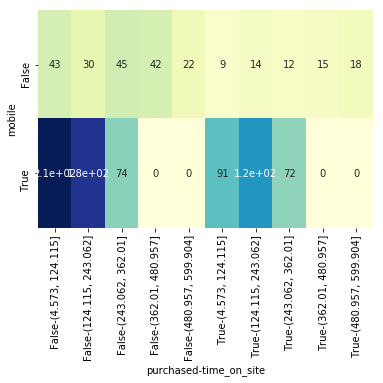

In [0]:
# heatmap

import seaborn as sns

sns.heatmap(pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins]), cmap='YlGnBu', annot=True, cbar=False)

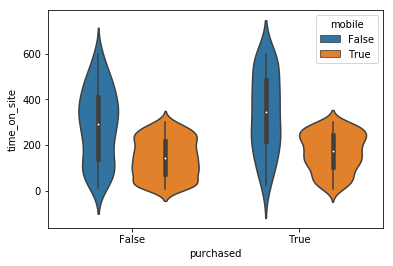

In [0]:
sns.violinplot(user_data['purchased'], user_data['time_on_site'], hue=user_data['mobile'])

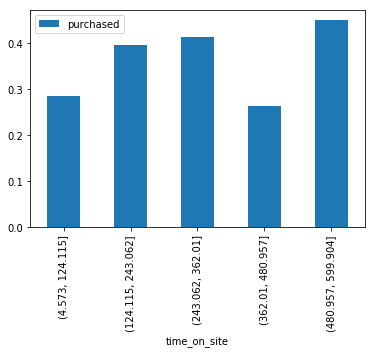

In [0]:
# average probability of purchase by time bins

pd.pivot_table(user_data, values='purchased', index=time_bins).plot.bar()

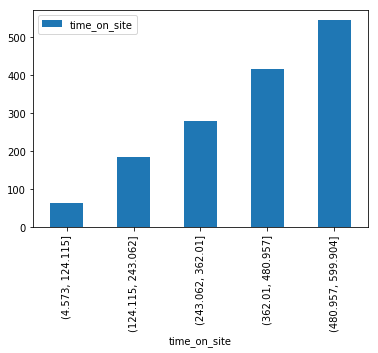

In [0]:
pd.pivot_table(user_data, values='time_on_site', index=time_bins).plot.bar();

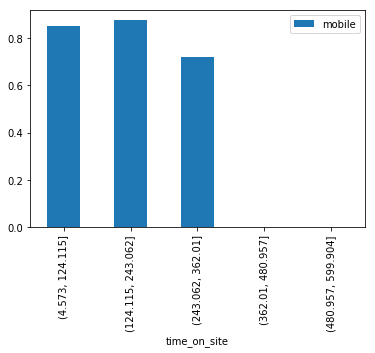

In [0]:
pd.pivot_table(user_data, values='mobile', index=time_bins).plot.bar();

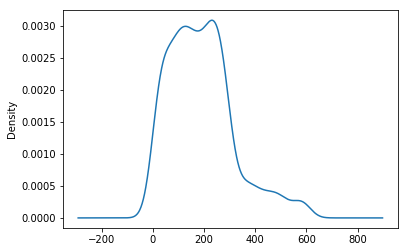

In [0]:
user_data['time_on_site'].plot.density()

In [0]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

ct

purchased              False               True           
mobile                 False     True      False     True 
time_on_site                                              
(4.573, 124.115]    0.236264  0.445887  0.132353  0.315972
(124.115, 243.062]  0.164835  0.393939  0.205882  0.434028
(243.062, 362.01]   0.247253  0.160173  0.176471  0.250000
(362.01, 480.957]   0.230769  0.000000  0.220588  0.000000
(480.957, 599.904]  0.120879  0.000000  0.264706  0.000000

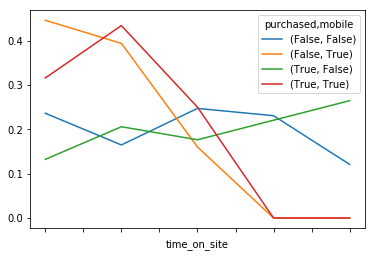

In [0]:
ct.plot();

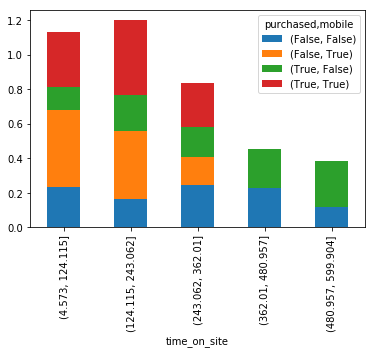

In [0]:
ct.plot(kind='bar', stacked=True);

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
persons_url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module4-databackedassertions/persons.csv'
  
persons = pd.read_csv(persons_url)

import matplotlib.pyplot as plt

In [0]:
persons.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


In [0]:
persons.shape

(1200, 4)

In [0]:
persons.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [0]:
weight_bins = pd.cut(persons.weight, 5)
age_bins = pd.cut(persons.age, 6)
exercise_bins = pd.cut(persons.exercise_time, 3)

Text(0.5, 1.0, 'Weight by Age')

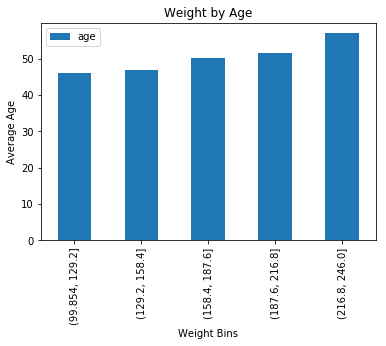

In [0]:
pd.pivot_table(persons, values='age', index=weight_bins).plot.bar();

plt.xlabel('Weight Bins')
plt.ylabel('Average Age')
plt.title('Weight by Age')

Text(0.5, 1.0, 'Exercise Time by Age')

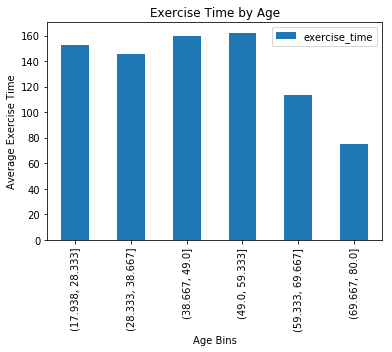

In [0]:
pd.pivot_table(persons, values='exercise_time', index=age_bins).plot.bar();

plt.xlabel('Age Bins')
plt.ylabel('Average Exercise Time')
plt.title('Exercise Time by Age')


Text(0.5, 1.0, 'Weight per Exercise Time')

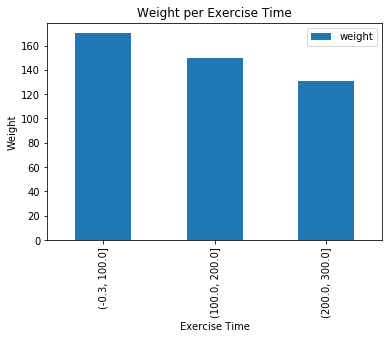

In [0]:
pd.pivot_table(persons, values='weight', index=exercise_bins).plot.bar();

plt.xlabel('Exercise Time')
plt.ylabel('Weight')
plt.title('Weight per Exercise Time')

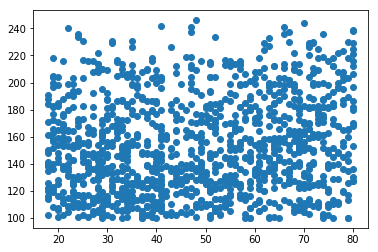

In [0]:
plt.scatter(persons.age, persons.weight);

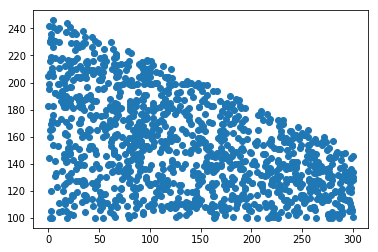

In [0]:
plt.scatter(persons.exercise_time, persons.weight);

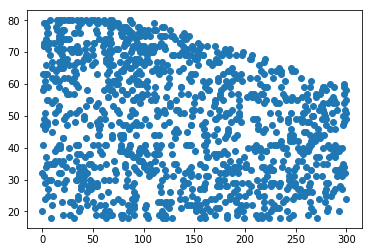

In [0]:
plt.scatter(persons.exercise_time, persons.age);

In [0]:
from scipy.stats.stats import pearsonr

print('Age / Weight correlation and p-value: ', pearsonr(persons.age, persons.weight))
print('Exercise Time / Weight correlation and p-value: ', pearsonr(persons.exercise_time, persons.weight))
print('Exercise Time / Age correlation and p-value: ', pearsonr(persons.exercise_time, persons.age))

Age / Weight correlation and p-value:  (0.14416818571376627, 5.299248993134188e-07)
Exercise Time / Weight correlation and p-value:  (-0.4780213304385565, 1.5656747078563096e-69)
Exercise Time / Age correlation and p-value:  (-0.27381804383521097, 4.429555470258789e-22)


### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?

*Each of the variable types here are continuous*

2.  What are the relationships between the variables?

*The strongest correlation is between Exercise Time and Weight. Weight consistently drops with increased exercise duration.*

*People also tend to exercise less as they age.*

*There's a slight overall increase in weight as people age, but it's less pronounced than the other factors.

3.  Which relationships are "real", and which spurious?

*I would say that all of the relationships are real, as backed by the data and common sense.*

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

try to use a groupby object to create some useful visualizations


In [0]:
# Attempting to compare NBA 3PT Attempts per season to Population
# Hit a road block with population data in chronological form and NBA data starting with most recent season
# Wasn't sure how to reverse data or otherwise get the two datasets to match

import requests
from bs4 import BeautifulSoup

In [0]:
nba_data = pd.read_csv('https://raw.githubusercontent.com/mmastin/Datasets/master/NBA%20League%20Averages%20per%20Game')

In [0]:
nba_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Per Game,Per Game.1,Per Game.2,...,Per Game.15,Shooting,Shooting.1,Shooting.2,Advanced,Advanced.1,Advanced.2,Advanced.3,Advanced.4,Advanced.5
0,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
1,1,2018-19,NBA,26.3,6-7,218,1230,241.6,41.1,89.2,...,111.2,.461,.355,.766,100.0,.524,12.4,22.9,.198,110.4
2,2,2017-18,NBA,26.4,6-7,219,1230,241.4,39.6,86.1,...,106.3,.460,.362,.767,97.3,.521,13.0,22.3,.193,108.6
3,3,2016-17,NBA,26.6,6-7,220,1230,241.6,39.0,85.4,...,105.6,.457,.358,.772,96.4,.514,12.7,23.3,.209,108.8
4,4,2015-16,NBA,26.7,6-7,221,1230,241.8,38.2,84.6,...,102.7,.452,.354,.757,95.8,.502,13.2,23.8,.209,106.4


In [0]:
population_data = pd.read_csv('https://raw.githubusercontent.com/mmastin/Datasets/master/comma-separated-values-file-1.csv')

In [0]:
population_data.head()

,Unnamed: 0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,North America,320.27638,324.44694,328.62014,332.72487,336.72143,340.74811,344.89548,349.07829,353.2939,...,417.83236,422.05268,426.06238,430.26938,434.47232,438.82964,443.3473,447.67394,451.83698,456.59331
1,Bermuda,0.05473,0.05491,0.05517,0.05551,0.05585,0.05618,0.05651,0.05683,0.05717,...,0.06361,0.06418,0.06476,0.06534,0.06591,0.06644,0.06692,0.06739,0.06784,0.06827
2,Canada,24.5933,24.9,25.2019,25.4563,25.7018,25.9416,26.2038,26.5497,26.8948,...,31.37674,31.64096,31.88931,32.13476,32.38638,32.65668,32.93596,33.2127,33.48721,33.75974
3,Greenland,0.05021,0.05103,0.05166,0.05211,0.05263,0.05315,0.05364,0.0541,0.05485,...,0.05713,0.05736,0.05754,0.0577,0.05778,0.05764,0.05753,0.05756,0.0576,0.05764
4,Mexico,68.34748,69.96926,71.6409,73.36288,75.08014,76.76723,78.44243,80.12249,81.78182,...,101.24696,102.47993,103.71806,104.95959,106.2029,107.44953,108.70089,109.9554,111.21179,112.46886


In [0]:
import numpy as np
population_data = np.transpose(population_data)

In [0]:
population_data.head()

,0,1,2,3,4,5,6,7,8,9,...,222,223,224,225,226,227,228,229,230,231
Unnamed: 0,North America,Bermuda,Canada,Greenland,Mexico,Saint Pierre and Miquelon,United States,Central & South America,Antarctica,Antigua and Barbuda,...,Sri Lanka,Taiwan,Thailand,Timor-Leste (East Timor),Tonga,U.S. Pacific Islands,Vanuatu,Vietnam,Wake Island,World
1980,320.27638,0.05473,24.5933,0.05021,68.34748,0.00599,227.22468,293.05856,NaN,0.06855,...,15.05597,17.84832,47.02576,--,0.09136,0.13796,0.11679,53.7152,NaN,4451.32679
1981,324.44694,0.05491,24.9,0.05103,69.96926,0.00601,229.46571,299.43033,NaN,0.06826,...,15.31549,18.17743,47.9365,--,0.09177,0.14283,0.12026,54.90268,NaN,4534.01064
1982,328.62014,0.05517,25.2019,0.05166,71.6409,0.00605,231.66446,305.95253,NaN,0.06801,...,15.57547,18.50139,48.82716,--,0.0922,0.14762,0.12379,56.14218,NaN,4613.94102
1983,332.72487,0.05551,25.4563,0.05211,73.36288,0.00607,233.79199,312.51136,NaN,0.06562,...,15.78446,18.80339,49.69425,--,0.09263,0.15281,0.12738,57.43635,NaN,4694.9362


In [0]:
plt.scatter(nba_data['Per Game.3'], population_data['Canada'])

KeyError: ignored